


### Задача:
Рассмотрим функцию $  f(x) = 3x^2 + 2x + 1 $ на интервале $[1, 4]$.
Вычислите определённый интеграл функции $ f(x) $ на заданном интервале




In [1]:
from scipy.integrate import quad

def f(x):
    return (3*x**2+2*x+1)

res = quad(f, 1, 4)[0]

print(round(res))

81


### Задача:
Найдите градиент функции $x^2+y^2$ в точке $(1,2)$

In [2]:
import numpy as np
from scipy.optimize import approx_fprime

def func(x):
    # Пример функции: f(x, y) = x^2 + y^2
    return x[0]**2 + x[1]**2

# Точка, в которой мы хотим найти градиент
x = np.array([1.0, 2.0])

# Вычисление градиента
eps = 0.0000001
grad=approx_fprime(x, func, [eps, np.sqrt(200) * eps])

print("Градиент функции в точке", x, ":", grad)

Градиент функции в точке [1. 2.] : [2.0000001  4.00000141]



### Задача:
Градиентный спуск — это итерационный метод оптимизации, который используется для поиска локального минимума дифференцируемой функции. Идея метода заключается в том, чтобы на каждом шаге двигаться в направлении наискорейшего убывания функции, которое определяется отрицательным градиентом функции в текущей точке.

В математической записи, алгоритм градиентного спуска можно представить следующим образом. Пусть $ f: \mathbb{R}^n \rightarrow \mathbb{R} $ — функция, которую мы хотим минимизировать. На каждом шаге $ k $ мы обновляем вектор параметров $ \mathbf{x} $ следующим образом:

$
\mathbf{x}_{k+1} = \mathbf{x}_k - \alpha \nabla f(\mathbf{x}_k),
$

где:
- $ \mathbf{x}_k $ — вектор параметров на шаге \( k \),
- $ \alpha $ — положительное число, называемое скоростью обучения,
- $ \nabla f(\mathbf{x}_k) $ — градиент функции $ f $ в точке $ \mathbf{x}_k $.

Скорость обучения $ \alpha $ контролирует размер шага, с которым алгоритм движется в направлении отрицательного градиента. Правильный выбор скорости обучения критически важен для сходимости алгоритма градиентного спуска к локальному минимуму.

Этот процесс повторяется до тех пор, пока изменения в векторе параметров $ \mathbf{x} $ или значение функции $ f $ не станут достаточно малыми, или пока не будет достигнуто максимальное количество итераций.

Напишите функцию, которая по коэф. $a, b, c$ и начальной точке $x$ возвращает точку минимума у параболы

In [6]:
def gradient_descent(a,b,c,x):
    alpha=0.1
    history=[]
    eps = 0.0000001
    y = a*x**2 + b*x + c
    history.append((x,y))
    for i in range(50):
        grad=approx_fprime(x, func, eps)
        x=x-alpha*grad
        y = a*x**2 + b*x + c
        history.append((x, y))
    return history # возвращаем минимальное значение x

C:\Users\Anna\anaconda3\lib\site-packages\numpy\ma\core.py:2825: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Users\Anna\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


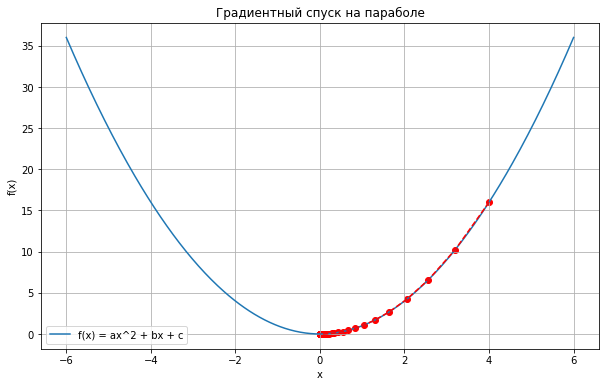

In [7]:
import matplotlib.pyplot as plt
a, b, c = 1, 0, 0
x = 4
history = gradient_descent(a, b, c, x)
# визуализация
x_history, y_history = zip(*history)
x = np.linspace(x - 10, x + 2, 400)
y = a*x**2 + b*x + c
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x) = ax^2 + bx + c')
plt.scatter(x_history, y_history, color='red')
plt.plot(x_history, y_history, color='red', linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Градиентный спуск на параболе')
plt.grid(True)
plt.show()



### Задача:
Используйте функцию minimize из библиотеки SciPy для поиска минимума функции Розенброка и Химмельблау

In [8]:
from scipy.optimize import minimize

# Функция Розенброка
def rosenbrock(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2


x0 = np.array([1.3, 0.7])

# Нахождение минимума функции Розенброка
result_rosenbrock = minimize(rosenbrock, x0, method='nelder-mead',
    options={'xtol': 1e-8, 'disp': True})

# Вывод результата
print("Минимум функции Розенброка:")
print("Найденное значение переменных:", result_rosenbrock.x)
print("Значение функции в найденной точке:", result_rosenbrock.fun)
print()

# Функция Химмельблау
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

# Нахождение минимума функции Химмельблау
result_himmelblau = minimize(himmelblau, x0, method='nelder-mead',
    options={'xtol': 1e-8, 'disp': True})

# Вывод результата
print("Минимум функции Химмельблау:")
print("Найденное значение переменных:", result_himmelblau.x)
print("Значение функции в найденной точке:", result_himmelblau.fun)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 79
         Function evaluations: 150
Минимум функции Розенброка:
Найденное значение переменных: [1. 1.]
Значение функции в найденной точке: 3.3736077629532093e-18

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 78
         Function evaluations: 152
Минимум функции Химмельблау:
Найденное значение переменных: [3. 2.]
Значение функции в найденной точке: 1.830100362654092e-16
